# Analyze the best "other activites" using tokens

In [15]:
import pandas as pd
data = pd.read_csv('input_data/Climbharder.csv')
data.columns = data.columns.str.replace(' ', '_').str.replace('?', '')

data['Other_activities_(ie_yoga,_cardio)'].fillna('', inplace=True)
data.head(10)

C:\Users\lucas\AppData\Local\Temp\ipykernel_6440\2856023011.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Other_activities_(ie_yoga,_cardio)'].fillna('', inplace=True)


,Timestamp,Sex,Height_(cm),Weight_(KG),Arm_Span_(cm),How_long_have_you_been_climbing_for,Where_do_you_climb,Hardest_V_Grade_ever_climbed_,Hardest_V_Grade_climbed_in_the_Last_3_months,The_V_grade_you_can_send_90-100%_of_routes_,...,Frequency_of_Endurance_training_sesions_per_week,Endurance_training_,General_Strength_Training_frequency_per_week_,Time_spent_General_strength_training_(hours),Type_of_Strength_training,"Other_activities_(ie_yoga,_cardio)",Max_pull_up_reps,5_rep_max_weighted_pull_ups,max_push_ups_reps,max_L-sit_time_
0,29/01/2017 20:12:46,Male,173,77,178,4.5 - 5 years,Indoor and outdoor climbing,V8,V8,V6,...,1,4x4,3,4,"Antagonists, Legs, Core",,15,29kg,40,30
1,29/01/2017 20:17:27,Male,180,81,180,3 - 3.5 years,Indoor Climbing only,V3,V3,V1,...,1,Laps of routes,2,2,"Antagonists, Legs, Core, Upper body pulling, U...","Yoga, stretching",11,5kg,24,15sec
2,29/01/2017 20:28:14,Male,178,67,175,.5 - 1 years,Indoor and outdoor climbing,V7,V6,V5,...,2,"4x4, ARC, route climbing intervals",3,2,"Antagonists, Core, Upper body pulling, Upper b...",soccer,17,20 kg,NaN,NaN
3,29/01/2017 20:51:08,Male,173,70,178,9 - 9.5 years,Indoor and outdoor climbing,V5,V4,V3,...,1,"Laps of routes, route climbing intervals",0,0,"Antagonists, Legs, Core, No other strength tra...",,8,NaN,30,NaN
4,29/01/2017 21:03:19,Male,184,84,197,6.5 - 7 years,Indoor and outdoor climbing,V10,V10,V7,...,2,"4x4, Max moves, threshold intervals",2,1,"Core, Upper body pushing",,NaN,NaN,NaN,NaN
5,29/01/2017 21:03:28,Male,176,67,170,5 - 5.5 years,Indoor and outdoor climbing,V7,I don't boulder,V7,...,0,I don't train for endurance,4,6,"Legs, Core, Upper body pulling, Upper body pus...",Trail running,9,NaN,15,20
6,29/01/2017 21:25:54,Male,184,75,181,1 - 1.5 years,Indoor Climbing only,V4,V4,V2,...,0,I don't train for endurance,2,4,"Legs, Core, Upper body pulling, Upper body pus...",,15,"17,5kg",Don't know,5sec
7,29/01/2017 22:10:27,Male,186,88,192,1.5 - 2 years,Indoor and outdoor climbing,V5,V5,V3,...,2,"Laps of routes, route climbing intervals, thre...",3,4,"Antagonists, Core, Upper body pulling, Upper b...",Cardio,9,25kg,25,NaN
8,29/01/2017 22:43:43,Male,185,60,180,.5 - 1 years,Indoor Climbing only,V2,V2,V1,...,0,I don't train for endurance,1,1,Core,,NaN,NaN,NaN,NaN
9,29/01/2017 23:28:42,Male,180,80,-,8.5 - 9 years,Indoor and outdoor climbing,V9,V7,V6,...,0,I don't train for endurance,1,2,"Antagonists, Core, Upper body pulling, Upper b...",,NaN,NaN,NaN,NaN


In [16]:
import numpy as np
# convert v grade to integer

def parse_int(height_str, valid_min, valid_max):
    if isinstance(height_str, str):
        try:
            height = int(''.join(filter(str.isdigit, height_str)))
            if valid_min <= height <= valid_max:
                return height
            else:
                return np.nan
        except ValueError:
            return np.nan
    else:
        return np.nan
    
data['The_V_grade_you_can_send_90-100%_of_routes_'] = data['The_V_grade_you_can_send_90-100%_of_routes_'].apply(lambda x: parse_int(x, 0, 20)) 
data['The_V_grade_you_can_send_90-100%_of_routes_'] = pd.to_numeric(data['The_V_grade_you_can_send_90-100%_of_routes_']).astype('float64')


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
imp = SimpleImputer() # default median
median_transform = ColumnTransformer([('imputer', imp, ['The_V_grade_you_can_send_90-100%_of_routes_'])], remainder='passthrough')
median_transform.fit(data)
data = pd.DataFrame(median_transform.transform(data), columns=median_transform.get_feature_names_out())
data.columns = [col.replace('remainder__', '').replace('imputer__', '') for col in data.columns]
data.head()

,The_V_grade_you_can_send_90-100%_of_routes_,Timestamp,Sex,Height_(cm),Weight_(KG),Arm_Span_(cm),How_long_have_you_been_climbing_for,Where_do_you_climb,Hardest_V_Grade_ever_climbed_,Hardest_V_Grade_climbed_in_the_Last_3_months,...,Frequency_of_Endurance_training_sesions_per_week,Endurance_training_,General_Strength_Training_frequency_per_week_,Time_spent_General_strength_training_(hours),Type_of_Strength_training,"Other_activities_(ie_yoga,_cardio)",Max_pull_up_reps,5_rep_max_weighted_pull_ups,max_push_ups_reps,max_L-sit_time_
0,6.0,29/01/2017 20:12:46,Male,173,77,178,4.5 - 5 years,Indoor and outdoor climbing,V8,V8,...,1,4x4,3,4,"Antagonists, Legs, Core",,15,29kg,40,30
1,1.0,29/01/2017 20:17:27,Male,180,81,180,3 - 3.5 years,Indoor Climbing only,V3,V3,...,1,Laps of routes,2,2,"Antagonists, Legs, Core, Upper body pulling, U...","Yoga, stretching",11,5kg,24,15sec
2,5.0,29/01/2017 20:28:14,Male,178,67,175,.5 - 1 years,Indoor and outdoor climbing,V7,V6,...,2,"4x4, ARC, route climbing intervals",3,2,"Antagonists, Core, Upper body pulling, Upper b...",soccer,17,20 kg,NaN,NaN
3,3.0,29/01/2017 20:51:08,Male,173,70,178,9 - 9.5 years,Indoor and outdoor climbing,V5,V4,...,1,"Laps of routes, route climbing intervals",0,0,"Antagonists, Legs, Core, No other strength tra...",,8,NaN,30,NaN
4,7.0,29/01/2017 21:03:19,Male,184,84,197,6.5 - 7 years,Indoor and outdoor climbing,V10,V10,...,2,"4x4, Max moves, threshold intervals",2,1,"Core, Upper body pushing",,NaN,NaN,NaN,NaN


In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)
X_train = train["Other_activities_(ie_yoga,_cardio)"].str.lower()
y_train = train['The_V_grade_you_can_send_90-100%_of_routes_']
X_test = test["Other_activities_(ie_yoga,_cardio)"].str.lower()
y_test = test['The_V_grade_you_can_send_90-100%_of_routes_']

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# tokenize data and fit
mytokenizer = RegexpTokenizer(r'\w+')

# tokenize data. Remove common words and words that appear less than 3 times
vectorizer = TfidfVectorizer(tokenizer=mytokenizer.tokenize, stop_words=stopwords.words('english'), min_df=3)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
from sklearn.ensemble import RandomForestRegressor

# use logistic regression to fit model
reg = RandomForestRegressor()

In [21]:
from sklearn.metrics import mean_squared_error

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

4.1311260481061405


In [22]:
from matplotlib import pyplot as plt

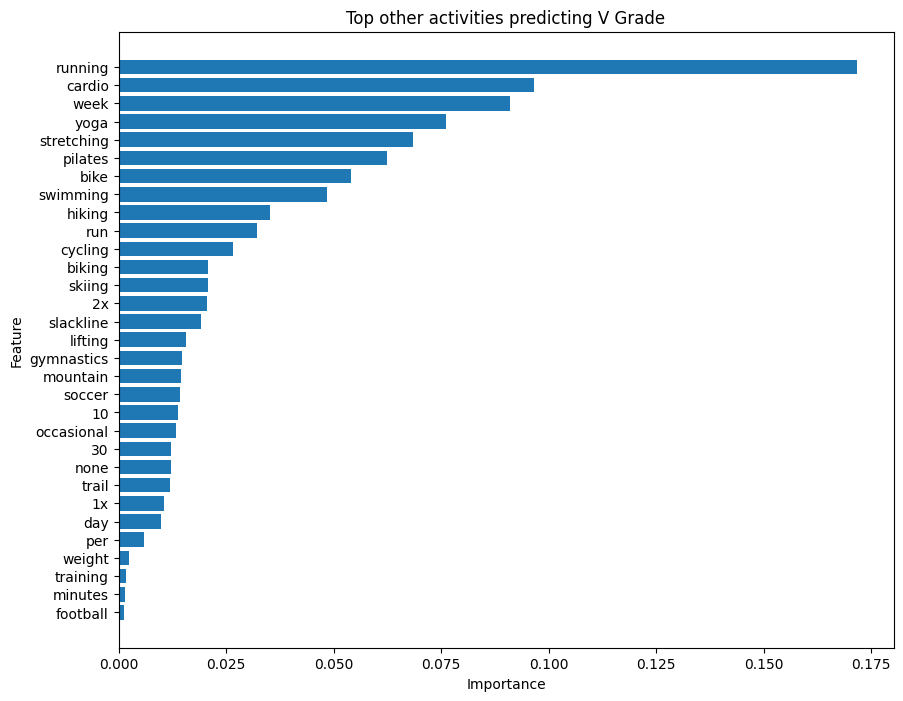

In [23]:
# Get feature importances
importances = reg.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame for the feature importances
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False).head(feature_importances.shape[0])

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top other activities predicting V Grade')

path_to_images = 'images/'
plt.gca().invert_yaxis()
plt.savefig(path_to_images + 'top_activities.png', bbox_inches='tight')
plt.show()

# Analysis

We see running and cardio are the best predictors for v grade as other activities to do, though stretching, pilates, yoga, biking, soccer and swimming all help. Football is the worst secondary activity for having a higher climbing grade. This is probably due to the benefits of the helpful activities giving the flexibility and strength required for rock climbing.

We also see that doing activities more shows a positive correlation correlation - as people that typed 2x (assuming meaning doing an acitvity 2x per week or day) do better than 1x. To further develop this point, doing activites by "day" is better than "minutes".